In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/MIT /FoodHub Project /CODE"

[NbConvertApp] Converting notebook /content/drive/MyDrive/MIT /FoodHub Project /CODE to html
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 948979 bytes to /content/drive/MyDrive/MIT /FoodHub Project /COD.html


# Uploading Data

In [ ]:
from google.colab import files # importing our data from drive
uploaded = files.upload()


Saving foodhub_order.csv to foodhub_order.csv


In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Understanding Data

In [ ]:
#Using this block of code to understand our headings for columns and to check if the data uploaded correctly.
df = pd.read_csv('foodhub_order.csv') #Assigns our data to df.
df.head() # prints the top 5 columns


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


# Question 1

Question 1: How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#This code helps us find the number of rows and columns in our data.
rows,cols = df.shape
print("Number of rows:", rows)
print(f"Number of columns:", cols)

# Observation:
# There are 1898 rows and 9 columns in the data.



Number of rows: 1898
Number of columns: 11


# Question 2

Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]


In [ ]:
df.info() #Helps us give a general view of the over all data, all the columns, and their data types.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observation: There are 4 object rows, 4 integer rows, and 1 float row.

# Question 3

Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#I noticed above that ratings were being shown as object and not a float because of rows having "Not given" values instead of a number.

df['rating'] = df['rating'].replace('Not given', np.nan) #Here in the rating column, 'Not given' is being replaced by 'Nan'. NaN = missing value in eyes of python.
df['rating'] = pd.to_numeric(df['rating']) #Here all the values in the rating columns is being turned into a numeric value.


In [ ]:
#Lets use median function to input the 736 missing values. We will calculate the median using group by, so we can get the restaurants average rating.
df['rating'] = df['rating'].fillna(df['rating'].median()) #Here the 'Nan' values are being replaced by the median rating of that specific restaurant.
df.isnull().sum() #sums the missing values from each column.

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


OBSERVATION: We had missing values for our ratings, which were written as Not given. I converted rows from "Not given" to "Nan" in the ratings column. Would help us in the future during calculations of averages.
Now we have 2 floats, 4 integars, and 3 object values in the data. Then I inputted the missing NaN values with median values for each restauraunt. So now we have no missing values.



# Question 4

Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T #Provides a statistival summary of the data from each row.

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,4.598525e+00,0.662289,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


Observation:
Here we can see that the time it takes food to be prepared.

1.   Minimum = 20 minutes

2.   Average = 27.37 minutes

3.   Maximum = 35 minutes.

# Question 6

Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Text(0, 0.5, 'Frequency')

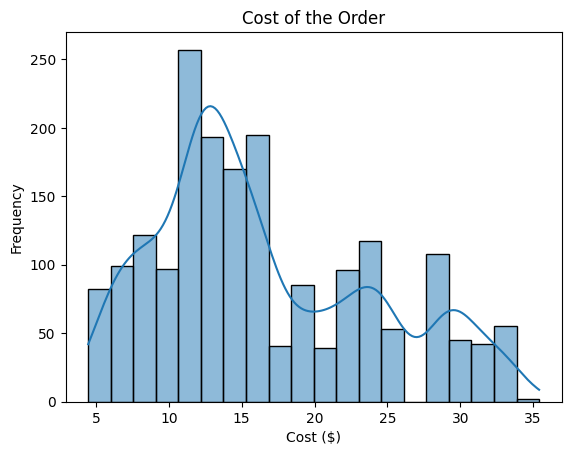

In [ ]:
#cost of order histogram
sns.histplot(df['cost_of_the_order'], kde=True, bins = 20)
plt.title('Cost of the Order')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')

Text(0.5, 0, 'Cost ($)')

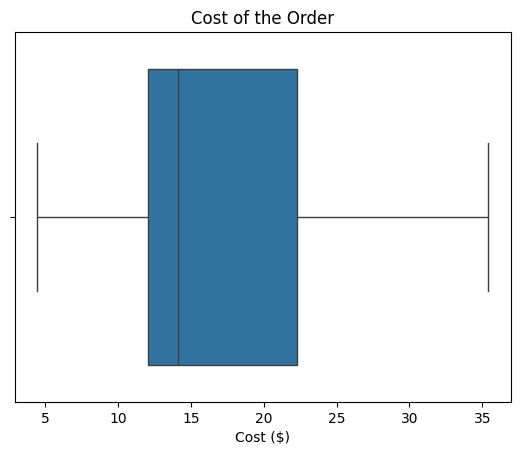

In [ ]:
#cost of order boxplot
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Cost of the Order')
plt.xlabel('Cost ($)')

Observation: according to the histogram we can see that most of our orders range in price between 10 to 18 dollars.
According to the box plot we see that median price of order is 15 dollars and that 50% of all order range between 13 and 22 dollars. The minimum price of order is near 5 dollars and the maximum being near 35 dollars.

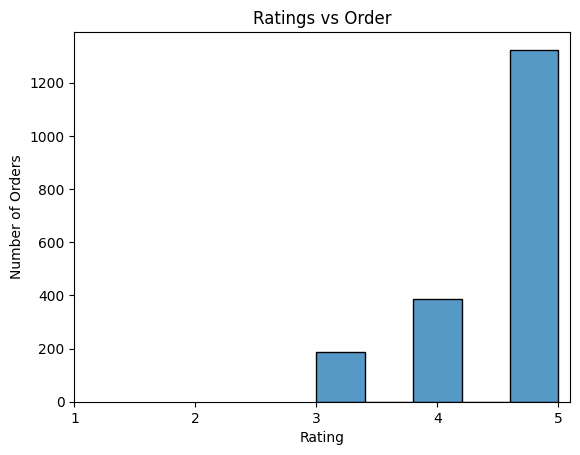

In [ ]:
#Rating Histogram
sns.histplot(df['rating'], bins=5) #went with 5 bins, so each bin can represent each rating value.
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.title('Ratings vs Order')
plt.show()

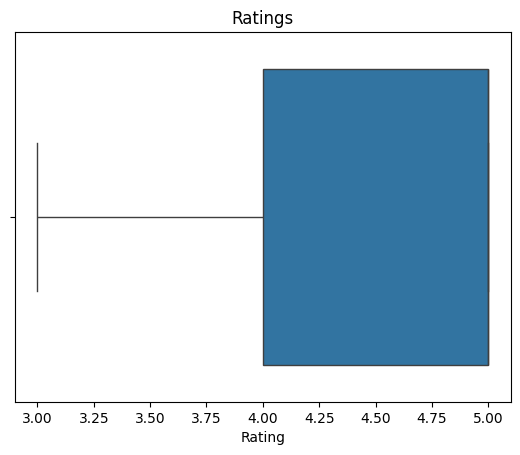

In [ ]:
#Rating boxplot
sns.boxplot(x=df['rating'])
plt.xlabel('Rating')
plt.title('Ratings')
plt.show()

Observation:
According to the histogram customers have more frequently given ratings between 4 and 5, few customers gave a 3 star rating while none gave below a 3.
According to the box plot, 50% of all the ratings fall between 4 and 5 which is very high, showing customer satisfaction. The median rating is around a 4.30 and the lowest rating is a 3 and there are no outliers.

Text(0, 0.5, 'Frequency')

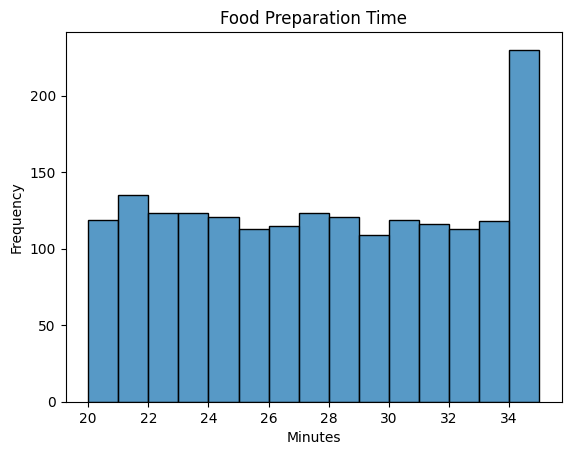

In [ ]:
#food prep time histogram
sns.histplot(df['food_preparation_time'], bins=15) #chose 15 bins because thats where data seemed to be accurately diplaying.
plt.title('Food Preparation Time')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

Observation: According to the histogram and boxplot, we can observe that the overall distribution of the timing to prepare food is fairly uniform. Time ranges from 20 to 35 minutes with 50% of the prep time being between 23 to 31 minutes with the average time to cook being 27 minutes.

Text(0.5, 0, 'Minutes')

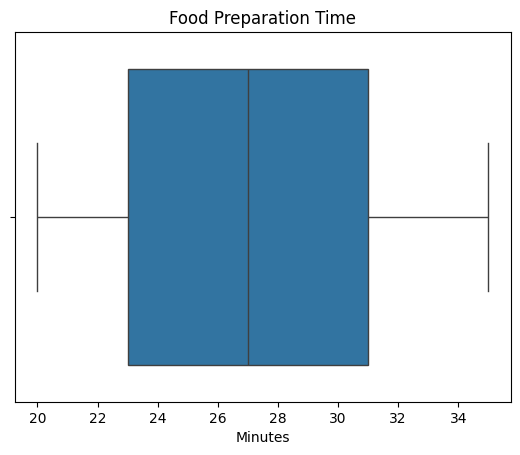

In [ ]:
#food prep time boxplot
sns.boxplot(x=df['food_preparation_time'])
plt.title('Food Preparation Time')
plt.xlabel('Minutes')

Text(0, 0.5, 'Frequency')

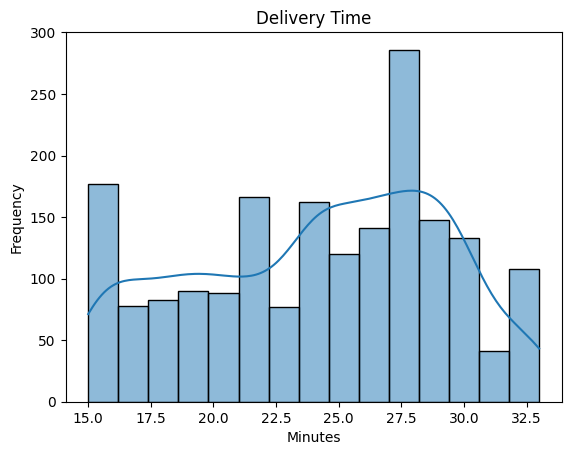

In [ ]:
# delivery time histogram
sns.histplot(df['delivery_time'], kde=True, bins=15)
plt.title('Delivery Time')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

Text(0.5, 0, 'Minutes')

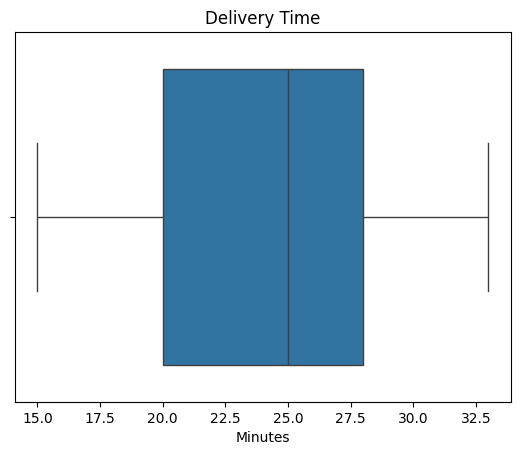

In [ ]:
#delivery time Boxplot
sns.boxplot(x=df['delivery_time'])
plt.title('Delivery Time')
plt.xlabel('Minutes')

Observation:
According to the histogram we can see that the delivery time varries from 15 to 32.5 minutes. Most of the deliveries take between 20 to 30 minutes.
According to the box plot we can see that 50% of the deliveries were delivered between 20 to 28 minutes and the average delivery time was 25 minutes.

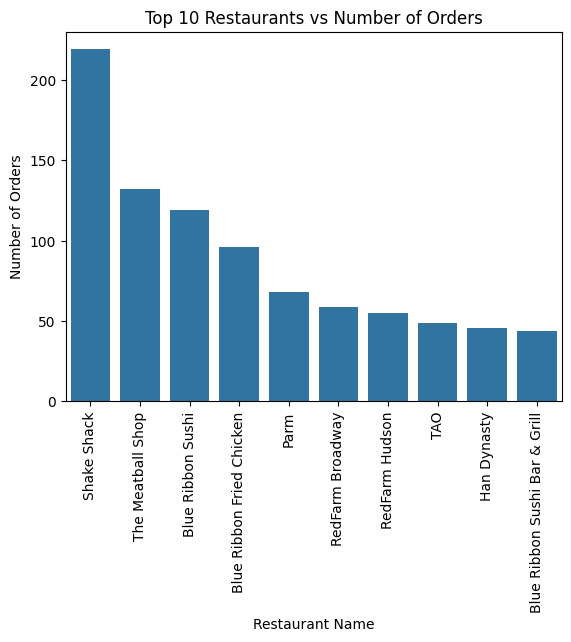

In [ ]:
#Top 10 restaurants by their frequency of orders - Histogram
order_counts = df['restaurant_name'].value_counts().head(10).index  # top 10 restaurants

sns.countplot(data=df, x='restaurant_name', order=order_counts)
plt.title('Top 10 Restaurants vs Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90) # The 90 helps write the names of the restaurant vertically.
plt.show()

Observation: According to this countplot we can see the bigger picture and conclude the top 10 restaurants by volume. We can see Shake Shack having the highest volume of orders and Blue Ribbon coming last.

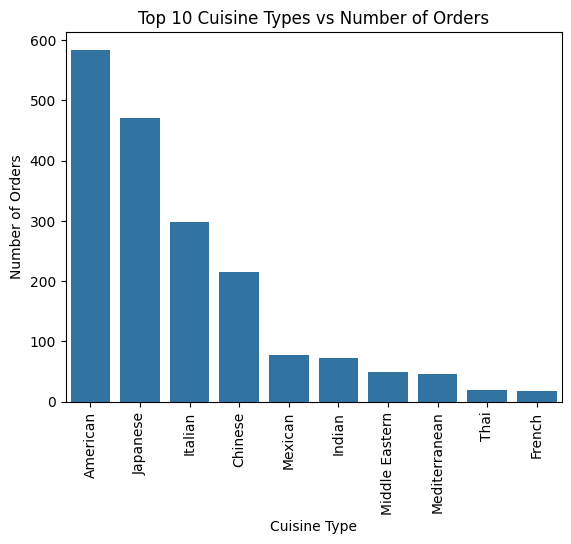

In [ ]:
#cuisine type - Histogram
# Get top 10 cuisine types by frequency of orders
top_10_cuisines = df['cuisine_type'].value_counts().head(10).index

# Countplot for top 10 cuisines
sns.countplot(data=df, x='cuisine_type', order=top_10_cuisines)
plt.title('Top 10 Cuisine Types vs Number of Orders')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

Observation: We can observe the top most ordered cuisine is American, whith Japanese and Italian following after. Thai and French placed last amont the top 10 most ordered cuisine types.

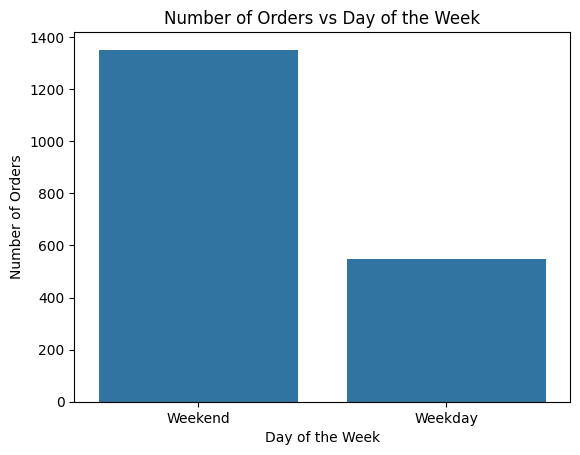

In [ ]:
#Day of The Week - Histogram
sns.countplot(data=df, x='day_of_the_week', order=['Weekend', 'Weekday'])
plt.title('Number of Orders vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

Observation: As we can see numbers of orders increase by alot during the weekends and not as much during the weekdays. The assignment description stated online food delivery was important for busy students and newyorkers, so I assumed they would order from restaurants mostly during the weekday during office hourse. But it seems they enjoy ordering food and eating at home during weekends.

# Question 7

Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]


In [ ]:
#Top 5 restaurants by order frequency
top_5_restaurants = df['restaurant_name'].value_counts().head(5) #Counting the most orders by Restaurant.
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


Observation: The top 5 restaurants with the most orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

# Question 8

Question 8: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter only weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend'] # This helps use the data only attributed to the weekends.
cuisine = weekend_orders['cuisine_type'].value_counts().idxmax() # This code picks out the most ordered cuisine.
print(cuisine)

American


Observation: The most ordered cuisine on the weekend is American.

# Question 9

Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
order_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Count total number of orders
total_orders = df.shape[0]

# Calculate percentage
percentage_above_20 = (order_above_20 / total_orders) * 100

print(percentage_above_20)

29.24130663856691


Observation: total percentage of orders above 20 dollars is 29.2 %.

# Question 10

Question 10: What is the mean order delivery time? [1 mark]

In [ ]:
deliverytime = df['delivery_time'].mean() # calculate average delivery time.
print(deliverytime)

24.161749209694417


Observation: The mean average delivery time overall is 24 minutes.

# Question 11

Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
top = df['customer_id'].value_counts().head(3) #Counting the top 3 customers by their customer id.
print(top)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


Observation: The top 3 customer id's are 52832 with 13 orders, then 47440 with 10 orders, then 83287 with 9 orders.

# Question 12

Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

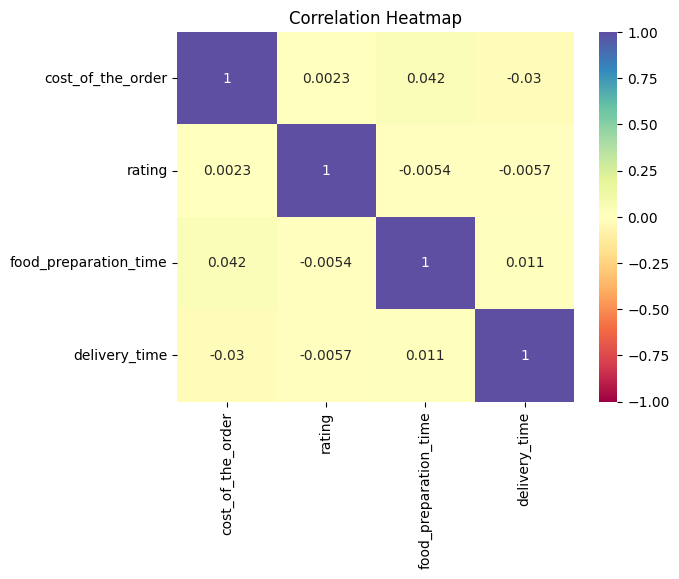

In [ ]:

#Heatmap
numeric_col = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
corr = df[numeric_col].corr()
sns.heatmap(corr, annot=True, cmap='Spectral', vmin=-1,vmax=1)
plt.title("Correlation Heatmap")
plt.show()




Observation: According to this heatmap, there is very little correlation between cost of order and ratings, also very little correlation between cost of order and delivery time, and weak correlation between cost of order and preparation time. Also no correlation between ratings and time taken to prepare.

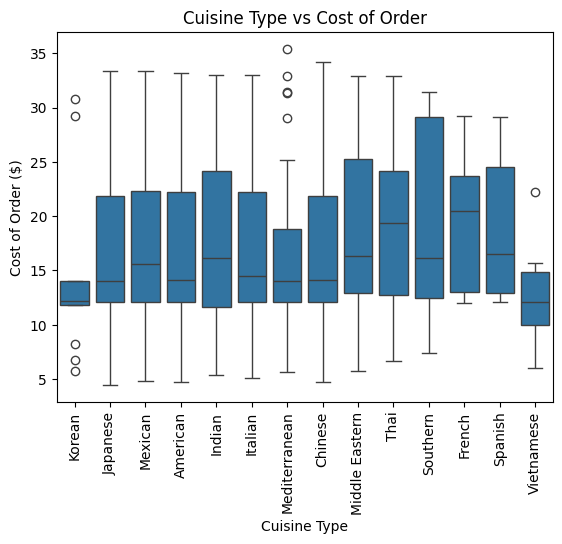

In [ ]:
#Box plot for cuisine vs Cost or order.
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.title('Cuisine Type vs Cost of Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order ($)')
plt.xticks(rotation=90)
plt.show()

Observation: We can clearly see that the average cost of cuisines is roughly in the 13 to 18 dollar range. Some cuisines like Thai and French have higher cost, that could also be why they had the least orders.

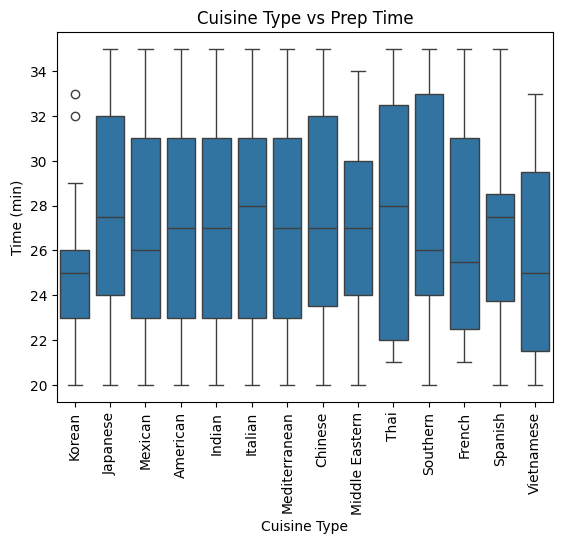

In [ ]:
#Box plot for cuisine vs Time it takes to prepare.
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title('Cuisine Type vs Prep Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Time (min)')
plt.xticks(rotation=90)
plt.show()

Observation: we can observe the average time for all cuisines is roughly the same, it takes aroung 27 minutes to prepare foods from all cuisine types. Some dishes from the Thai and Japanese cuisine types have higher cook times. Korean food has the least prep time.

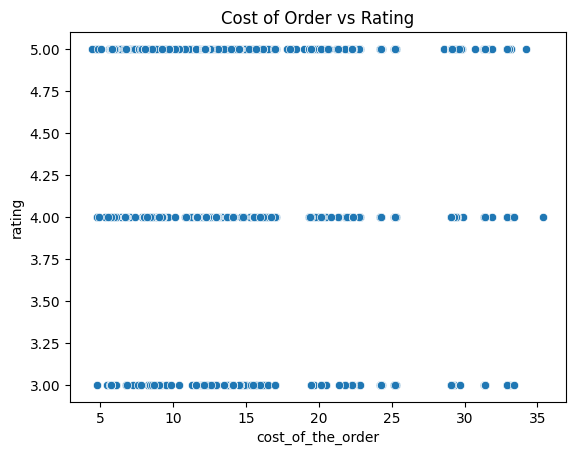

In [ ]:
#cost of order vs rating
sns.scatterplot(data=df, x='cost_of_the_order', y='rating')
plt.title("Cost of Order vs Rating")
plt.show()

Observation: there is no relation or very little relation between cost of order and the rating a restaurant gets.

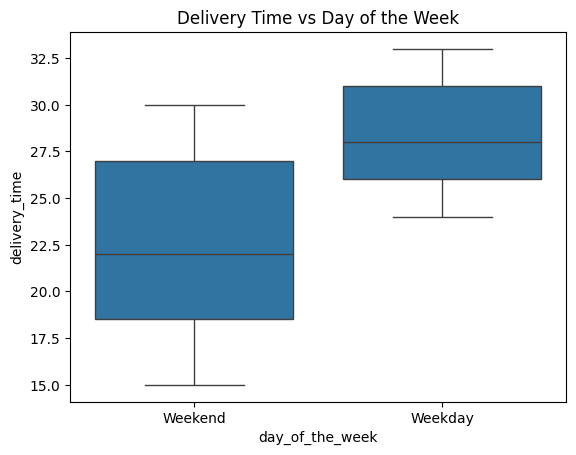

In [ ]:
# Delivery time by day of the week

sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Delivery Time vs Day of the Week")
plt.show()

Observation: We can observe a shorter delivery times during the weekends compared to weekdays, we observed that there were much more orders placed during weekends above, which could be the cause of such high range of delivery times during weekends.

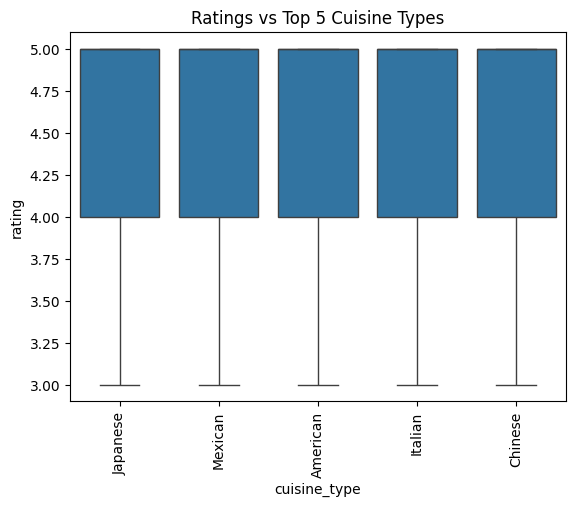

In [ ]:
# Rating by cuisine type (top 5 cuisines only)
top_cuisines = df['cuisine_type'].value_counts().head(5).index
sns.boxplot(data=df[df['cuisine_type'].isin(top_cuisines)], x='cuisine_type', y='rating')
plt.title("Ratings vs Top 5 Cuisine Types")
plt.xticks(rotation=90)
plt.show()

Observation: we can see overall there is no correlation between the type of cuisine vs rating. People dont rate higher or lower depending on which cuisine they orders, they rate based on how well that cuisine tastes.

# Question 13

Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# This code allows us to get restaurants with their rating counts and mean ratings.
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# This code allows us to get restaurant with rating count over 50 and average rating over 4.
restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]
print(restaurants)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     96  4.552083
Blue Ribbon Sushi            119  4.521008
Parm                          68  4.500000
RedFarm Broadway              59  4.474576
RedFarm Hudson                55  4.490909
Shake Shack                  219  4.561644
The Meatball Shop            132  4.689394


Observation: these are the restaurants who meet broth criteria for having more than 50 and an average rating of 4,

# Question 14

Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# This is our main revenue calculation component.
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25 #if cost is greaten than 20, then company will charge cost * 25%
    elif cost > 5:
        return cost * 0.15 #if cost greaten than 5 than company charges cost * 15%
    else:
        return 0

# function to create a revenue column using our above calculation component.
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Total revenue
total= df['revenue'].sum()
print(total)

6166.303


Observation: Total revenue generated by the coompany is 6,166 dollars. They charge 25% on order value over 20 and 15% on order value of greater than 5 dollars or less than 20 dollars.


# Question 15

Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Here we calculate time to prep food in the kitchen and time it takes for delivery.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders taking more than 60 min by dividing number of orders which take over 60 min to prep and deliver and divide by total number of orders.
percentage = (df['total_time'] > 60).mean() * 100

print(percentage)

10.537407797681771


Observation: So, about 10.5% of orders take more than 60 minuted to be delivered from the time of ordering.

# Question 16

Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
mean_time = df.groupby('day_of_the_week')['delivery_time'].mean() #Grouping the day of the weeks together and providing their respective delivery time.

print(mean_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


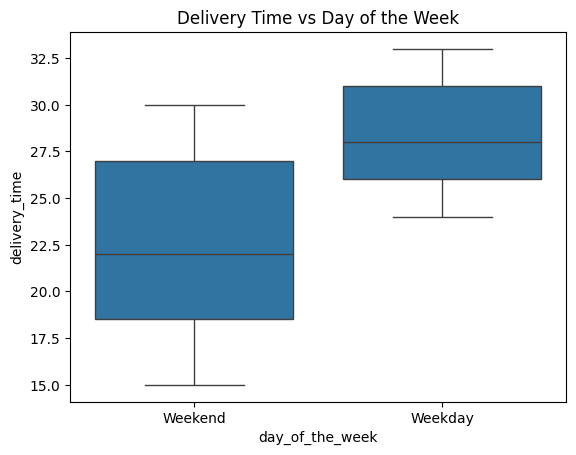

In [ ]:
# Delivery time by day of the week

sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Delivery Time vs Day of the Week")
plt.show()

Observation: According to the calculation and the boxplot, the mean delivery time is greater for weekday compared to of the weekend.

# Question 5


Question 5: How many orders are not rated? [1 mark]

In [ ]:
#To figure out how many orders were not rated initially , I re-imported the data file.
from google.colab import files
uploaded = files.upload()

# import libraries for data manipulation
import numpy as np
import pandas as pd

Saving foodhub_order.csv to foodhub_order (2).csv


In [ ]:
df = pd.read_csv('foodhub_order.csv') #Assigns df to our data
df['rating'] = df['rating'].replace('Not given', np.nan) # Replacing 'Not given' with Nan, since python reads it as missing value.
df.isnull().sum() #use this code to find the number of NaN (missing values in each columns).

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


Observation: We can observe that initially in the data file, there were 736 rows under the Ratings column which were missing values. In Question 3, I replaced those missing values with the median rating given to each restaurant. So then we had no more missing values left.

# Question 17

Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

Conclusions:


*   I can conclude that the over all csutomer experience has been very good indicated by the high ratings resaurants are getting. Most ratings land between 4 or 5 star.


*   Ratings do not depend on cost of food or food delivery time, because there was no correlation between price of food or time with ratings, suggesting consumers prefer the quality and taste of the cuisins over price or delivery time.


*   I noticed that the food delivery time and food preperation times have been failry unofirm without much variance. However, delivery time was longer on weekdays compared to weekends.



*   We can also conclude that customers mainly prefer American style cuisine, followed by Japanese and Italian. The least ordered foods being Thai and French.


Recomendation:


*   Decrease the wider range in delivery time during weekdays. Currently the delivery time is between 15 to 30 minutes, which could cause consumers to not order as much during office hourse, if that time could be reduced using special and faster routing systems for the drivers, consumers would be more likely to order food on weekdays.

*   I would also add more drivers to the weekdays, maybe the reason the delivery time is slower on weekdays is due to a lesser numeber of available drivers, with more drivers we could get faster delivery times, which would increase orders and in turn raise revenue.

*   We should assign a account manager to the restaurants with lower order count to help them learn how to market their cuisines better and help with marekting tips and pricing of their products, this would help increase their revenue and in turn the company can charge higher fees.











Thank you for your time!